# **Assignment-3 Dwarakanath Chandra (8856840)**

In [429]:
# Installing the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## **Question-1**

### **Part-A: Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.**

### **Importing the IRIS Dataset**

In [430]:
# Load the iris dataset into iris variable

iris = load_iris(as_frame=True, return_X_y=False)

In [431]:
# Defining the feature matrix and target vector

X = iris.data
y = iris.target
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

### **Checking the dependency between the indpendent features of the dataset**

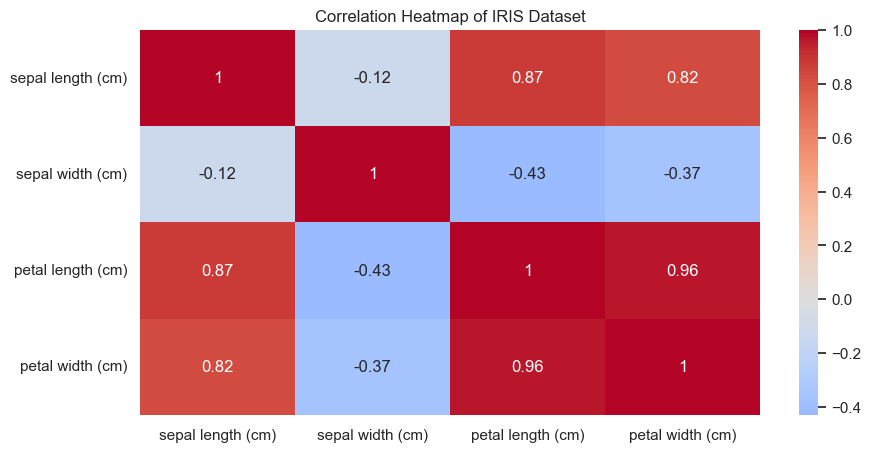

In [432]:
# Plotting the correlation matrix for independent variables of iris data

# Developing correlation matrix
cor_mat = X.corr()
cor_mat

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of IRIS Dataset")
plt.show()

In [433]:
# Dropping the features sepal length and sepal width columns for simplicity

data = X.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1)
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### **Part-B: Figure out if any preprocessing such as scaling would help here**

In [434]:
# Preprocessing the data to to get the values in the same order

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
data = scaler.fit_transform(data)

data = pd.DataFrame(data)

data.columns = ['petal_length_(cm)', 'petal_width_(cm)']

data

,petal_length_(cm),petal_width_(cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


### **Part-C: Draw elbow plot and from that figure out optimal value of k**

In [435]:
# finding wcss value for different number of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=16)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

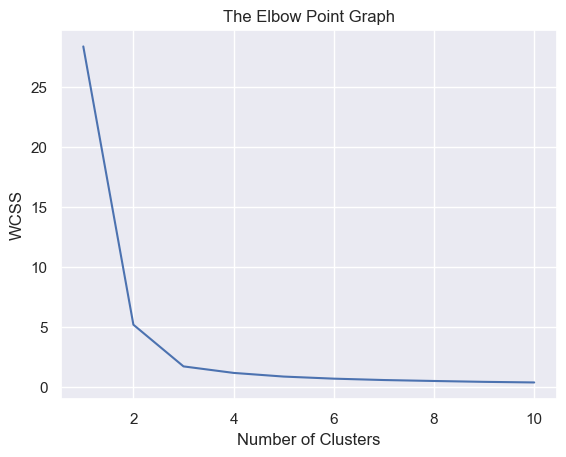

In [436]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### **The above elbow plot illustrates that, the number of optimum clusters = 3. (After 3 clusters, there is no significant drop in the WCSS value). Hence, the optimal value of k = 3**

### **Forming the K-fold clustering using K = 3**

In [437]:
# Perform K-means clustering with 3 clusters on data

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=16)
kmeans.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=16)

In [438]:
# return a label for each data point based on their cluster

y_pred = kmeans.fit_predict(data)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


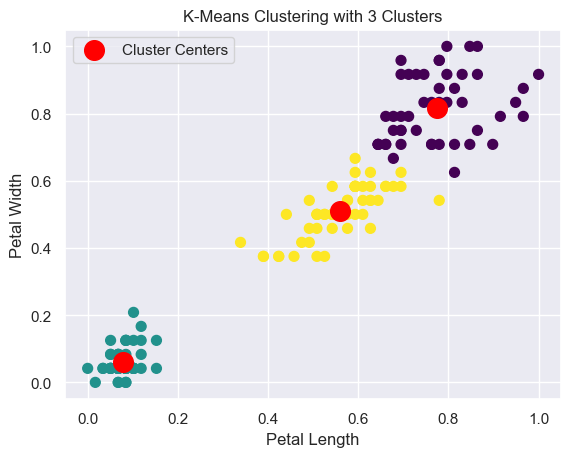

In [439]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(data['petal_length_(cm)'], data['petal_width_(cm)'], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-Means Clustering with 3 Clusters')
plt.legend()
plt.show()

## **Question-2**

### **Part-A: Importing the heart disease dataset**

In [440]:
df = pd.read_csv(r'C:\Users\dwara\OneDrive\Desktop\AIALMA\CSCN8000-lab-submissions\students-submissions\8856840\heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### **Part-B: Scaling the data using Z-score Standardization**

In [441]:
# Standardizing the numerical features using Z-score

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for column in df.columns:
    if((((df[column].dtype) == 'int64') | ((df[column].dtype) == 'float64')) & (column != 'HeartDisease')):
        df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))
    else:
        continue

print(df)

          Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG   
0   -1.433140   M           ATA   0.410909     0.825070  -0.551341     Normal  \
1   -0.478484   F           NAP   1.491752    -0.171961  -0.551341     Normal   
2   -1.751359   M           ATA  -0.129513     0.770188  -0.551341         ST   
3   -0.584556   F           ASY   0.302825     0.139040  -0.551341     Normal   
4    0.051881   M           NAP   0.951331    -0.034755  -0.551341     Normal   
..        ...  ..           ...        ...          ...        ...        ...   
913 -0.902775   M            TA  -1.210356     0.596393  -0.551341     Normal   
914  1.536902   M           ASY   0.627078    -0.053049   1.813758     Normal   
915  0.370100   M           ASY  -0.129513    -0.620168  -0.551341     Normal   
916  0.370100   F           ATA  -0.129513     0.340275  -0.551341        LVH   
917 -1.645286   M           NAP   0.302825    -0.217696  -0.551341     Normal   

        MaxHR ExerciseAngin

### **Part-C: Removing Outliers in the data using Z-score**

In [442]:
# Removing the outliers with Z-score of more the 3 standard deviation away from mean = 0

df_filtered = df.loc[
    (df['Age'].between(-3, 3)) &
    (df['RestingBP'].between(-3, 3)) &
    (df['Cholesterol'].between(-3, 3)) &
    (df['FastingBS'].between(-3, 3)) &
    (df['MaxHR'].between(-3, 3)) &
    (df['Oldpeak'].between(-3, 3))
]

df_filtered

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,M,TA,-1.210356,0.596393,-0.551341,Normal,-0.188999,N,0.293283,Flat,1
914,1.536902,M,ASY,0.627078,-0.053049,1.813758,Normal,0.164684,N,2.357094,Flat,1
915,0.370100,M,ASY,-0.129513,-0.620168,-0.551341,Normal,-0.857069,Y,0.293283,Flat,1
916,0.370100,F,ATA,-0.129513,0.340275,-0.551341,LVH,1.461525,N,-0.832432,Flat,1


Total 19 outliers removed from the dataset after applying Z-score outlier removal technique.

### **Part-D: Converting the Text columns to Numberical using one-hot-encoding**

In [443]:
# List of columns to one-hot encode
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Perform one-hot encoding for the specified columns
encoded_df = pd.get_dummies(df_filtered, columns=columns_to_encode)

# Convert the One-hot-encoded boolean columns to integers 1 or 0
encoded_df.iloc[:, 6:] = encoded_df.iloc[:, 6:].astype(int)

# Print the DataFrame after one-hot encoding with True and False
encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [444]:
# Move the 'HeartDisease' column to the last position
encoded_df = encoded_df[[col for col in encoded_df.columns if col != 'HeartDisease'] + ['HeartDisease']]

# Print the DataFrame with 'HeartDisease' column as the last column
encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


### **Part-E: Classification Model Building**

#### **Splitting the data into Feature Matrix and Target Vector**

In [445]:
X = encoded_df.iloc[:,:-1] # Defining the feature matric with all independent variables
y = encoded_df['HeartDisease'] # Defining the target vector of dependent variable

#### **Splitting the data into train and test data**

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=16)
print(y_train.value_counts())
print(y_test.value_counts())

HeartDisease
1    392
0    327
Name: count, dtype: int64
HeartDisease
1    100
0     80
Name: count, dtype: int64


#### **Support Vector Machine Classification**

In [447]:
# Fitting the Standalone SVM model with training data

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [448]:
# Predicting the heart disease using the model on test data

y_pred_svm = svm_model.predict(X_test)

y_pred_svm

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [449]:
# Find the SVM standalone classifier model performance metrics without cross-validation

print("The accuracy score of the SVM standlone classifier is:", accuracy_score(y_test, y_pred_svm))

print("The confusion matrix of the SVM standlone classifier is:", confusion_matrix(y_test, y_pred_svm), sep = '\n')

print("The recall score of the SVM standlone classifier is:", recall_score(y_test, y_pred_svm))

print("The precision score of the SVM standlone classifier is:", precision_score(y_test, y_pred_svm))

print("The f1 score of the SVM standlone classifier is:", f1_score(y_test, y_pred_svm))

The accuracy score of the SVM standlone classifier is: 0.8833333333333333
The confusion matrix of the SVM standlone classifier is:
[[66 14]
 [ 7 93]]
The recall score of the SVM standlone classifier is: 0.93
The precision score of the SVM standlone classifier is: 0.8691588785046729
The f1 score of the SVM standlone classifier is: 0.8985507246376813


In [450]:
# Performing Cross validation on SVM standalone Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.85416667 0.84722222 0.88194444 0.84722222 0.84615385]
Mean accuracy: 0.8553418803418802
Cross-validation precision scores: [0.86151442 0.84722222 0.88256448 0.84754915 0.848779  ]
Mean precision: 0.8575258538138189
Cross-validation Recall Scores: [0.80593963 0.85345667 0.87062937 0.9009324  0.81923077]
Mean Recall Score: 0.850037768139034


#### **Logistic Regression Classification**

In [451]:
# Fitting the logistic regression model with training data

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [452]:
# Predicting the heart disease using the model on test data

y_pred_log = log_model.predict(X_test)

y_pred_log

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [453]:
# Find the Logistic Regression classifier model performance metrics without cross-validation

print("The accuracy score of the Logistic Regression classifier is:", accuracy_score(y_test, y_pred_log))

print("The confusion matrix of the Logistic Regression classifier is:", confusion_matrix(y_test, y_pred_log), sep = '\n')

print("The recall score of the Logistic Regression classifier is:", recall_score(y_test, y_pred_log))

print("The precision score of the Logistic Regression classifier is:", precision_score(y_test, y_pred_log))

print("The f1 score of the Logistic Regression classifier is:", f1_score(y_test, y_pred_log))

The accuracy score of the Logistic Regression classifier is: 0.8611111111111112
The confusion matrix of the Logistic Regression classifier is:
[[63 17]
 [ 8 92]]
The recall score of the Logistic Regression classifier is: 0.92
The precision score of the Logistic Regression classifier is: 0.8440366972477065
The f1 score of the Logistic Regression classifier is: 0.8803827751196172


In [454]:
# Performing Cross validation on Logistic Regression Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(log_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(log_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.84027778 0.84027778 0.88194444 0.85416667 0.85314685]
Mean accuracy: 0.8539627039627039


Cross-validation precision scores: [0.84462723 0.8405295  0.8839249  0.85420689 0.85487631]
Mean precision: 0.8556329627737043
Cross-validation Recall Scores: [0.81996105 0.85345667 0.9009324  0.9009324  0.83461538]
Mean Recall Score: 0.8619795815998348


#### **Random Forest Classification**

In [455]:
# Fitting the Random Forest regression model with training data

rfc_model = RandomForestClassifier(n_estimators=500, max_samples=0.8, oob_score=True, random_state=16)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, oob_score=True,
                       random_state=16)

In [456]:
# Predicting the heart disease using the model on test data

y_pred_rfc = rfc_model.predict(X_test)

y_pred_rfc

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [457]:
# Find the Random Forest classifier model performance metrics without cross-validation

print("The accuracy score of the Random Forest classifier is:", accuracy_score(y_test, y_pred_rfc))

print("The confusion matrix of the Random Forest classifier is:", confusion_matrix(y_test, y_pred_rfc), sep = '\n')

print("The recall score of the Random Forest classifier is:", recall_score(y_test, y_pred_rfc))

print("The precision score of the Random Forest classifier is:", precision_score(y_test, y_pred_rfc))

print("The f1 score of the Random Forest classifier is:", f1_score(y_test, y_pred_rfc))

The accuracy score of the Random Forest classifier is: 0.9222222222222223
The confusion matrix of the Random Forest classifier is:
[[69 11]
 [ 3 97]]
The recall score of the Random Forest classifier is: 0.97
The precision score of the Random Forest classifier is: 0.8981481481481481
The f1 score of the Random Forest classifier is: 0.9326923076923077


In [458]:
# Performing Cross validation on Random Forest Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(rfc_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(rfc_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(rfc_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.86805556 0.83333333 0.88194444 0.84027778 0.86013986]
Mean accuracy: 0.8567501942501942
Cross-validation precision scores: [0.86934156 0.83359559 0.88256448 0.84373381 0.86267066]
Mean precision: 0.8583812234175847
Cross-validation Recall Scores: [0.82765336 0.8570594  0.88344988 0.88461538 0.83076923]
Mean Recall Score: 0.8567094508866662


### **Performance Metrics Summary**

#### **For SVM Model**

##### **Without cross-validation**

* The accuracy score of the SVM standlone classifier is: 0.8833333333333333
* The confusion matrix of the SVM standlone classifier is: <br>
    [[66 14] <br>
    [ 7 93]]
* The recall score of the SVM standlone classifier is: 0.93
* The precision score of the SVM standlone classifier is: 0.8691588785046729
* The f1 score of the SVM standlone classifier is: 0.8985507246376813

##### **With cross-validation**

* Cross-validation accuracy scores: [0.85416667 0.84722222 0.88194444 0.84722222 0.84615385]
* Mean accuracy: 0.8553418803418802
* Cross-validation precision scores: [0.86151442 0.84722222 0.88256448 0.84754915 0.848779  ]
* Mean precision: 0.8575258538138189
* Cross-validation Recall Scores: [0.80593963 0.85345667 0.87062937 0.9009324  0.81923077]
* Mean Recall Score: 0.850037768139034

#### **For Logistic Regression Model**

##### **Without cross-validation**

* The accuracy score of the Logistic Regression classifier is: 0.8611111111111112
* The confusion matrix of the Logistic Regression classifier is:<br>
    [[63 17]<br>
    [ 8 92]]
* The recall score of the Logistic Regression classifier is: 0.92
* The precision score of the Logistic Regression classifier is: 0.8440366972477065
* The f1 score of the Logistic Regression classifier is: 0.8803827751196172

##### **With cross-validation**

* Cross-validation accuracy scores: [0.84027778 0.84027778 0.88194444 0.85416667 0.85314685]
* Mean accuracy: 0.8539627039627039
* Cross-validation precision scores: [0.84462723 0.8405295  0.8839249  0.85420689 0.85487631]
* Mean precision: 0.8556329627737043
* Cross-validation Recall Scores: [0.81996105 0.85345667 0.9009324  0.9009324  0.83461538]
* Mean Recall Score: 0.8619795815998348

#### **For Random Forest Classification Model**

##### **Without cross-validation**

* The accuracy score of the Random Forest classifier is: 0.9222222222222223
* The confusion matrix of the Random Forest classifier is:<br>
    [[69 11]<br>
    [ 3 97]]
* The recall score of the Random Forest classifier is: 0.97
* The precision score of the Random Forest classifier is: 0.8981481481481481
* The f1 score of the Random Forest classifier is: 0.9326923076923077

##### **With cross-validation**

* Cross-validation accuracy scores: [0.86805556 0.83333333 0.88194444 0.84027778 0.86013986]
* Mean accuracy: 0.8567501942501942
* Cross-validation precision scores: [0.86934156 0.83359559 0.88256448 0.84373381 0.86267066]
* Mean precision: 0.8583812234175847
* Cross-validation Recall Scores: [0.82765336 0.8570594  0.88344988 0.88461538 0.83076923]
* Mean Recall Score: 0.8567094508866662

### **From the above performance metrics summary of all 3 classification models, we can see that Random Forest Classification model has the best performance. Hence, random forest model is the most suitable model to predict the heart disease.**

### **Part-F: Performing PCA on the standardized heart disease data**

In [459]:
# Standardize the heart disease dataset

# Performing Standardization on already standardized numerical columns won't change the values. However, the one-hot-encoded categorical columns will be standardized around the mean = 0.

# Perform Z-score standardization

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

X_std = pd.DataFrame(X_std)

X_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.428154,0.465900,0.849636,-0.550362,1.384320,-0.855469,-0.515943,0.515943,-1.077524,2.063325,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695
1,-0.475855,1.634714,-0.168122,-0.550362,0.752973,0.137516,1.938199,-1.938199,-1.077524,-0.484655,1.869492,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294
2,-1.745588,-0.118507,0.793612,-0.550362,-1.535661,-0.855469,-0.515943,0.515943,-1.077524,2.063325,-0.534905,-0.229550,-0.503821,-1.235023,2.041241,0.822945,-0.822945,-0.260184,-0.998888,1.134695
3,-0.581666,0.349019,0.149344,-0.550362,-1.141069,0.634008,1.938199,-1.938199,0.928054,-0.484655,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,-1.215148,1.215148,-0.260184,1.001113,-0.881294
4,0.053200,1.050307,-0.028064,-0.550362,-0.588640,-0.855469,-0.515943,0.515943,-1.077524,-0.484655,1.869492,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,-0.899099,-1.287320,0.616205,-0.550362,-0.194048,0.336112,-0.515943,0.515943,-1.077524,-0.484655,-0.534905,4.356349,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294
895,1.534554,0.699663,-0.046738,1.816985,0.161085,2.520678,-0.515943,0.515943,0.928054,-0.484655,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294
896,0.370633,-0.118507,-0.625646,-0.550362,-0.864854,0.336112,-0.515943,0.515943,0.928054,-0.484655,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,-1.215148,1.215148,-0.260184,1.001113,-0.881294
897,0.370633,-0.118507,0.354763,-0.550362,1.463238,-0.855469,1.938199,-1.938199,-1.077524,2.063325,-0.534905,-0.229550,1.984833,-1.235023,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294


In [460]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

X_pca = pca.fit_transform(X_std)

X_pca.shape # 95% of information captured only with 13 pca components 

(899, 13)

In [461]:
pca.explained_variance_ratio_

array([0.22550291, 0.10019256, 0.09048199, 0.0723219 , 0.0704889 ,
       0.06377371, 0.06102717, 0.05728687, 0.05128931, 0.04567824,
       0.04090691, 0.04041658, 0.03067554])

In [462]:
pca.n_components_

13

The PCA created by 13 components from 20 columns is as follow

In [463]:
X_pca = pd.DataFrame(X_pca)

X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.076329,-1.371946,-0.366686,-0.266779,-1.550713,-0.695173,-0.518826,1.088001,0.055632,-0.727057,0.459892,-0.481917,0.322624
1,1.482291,1.946285,-1.567709,-0.611478,2.722542,0.003551,-0.728085,0.386123,0.032121,-0.005042,-0.083110,-1.224236,1.465058
2,1.908796,-0.724799,1.450531,1.713999,-1.466029,-1.550059,-1.305906,0.221045,0.948490,-0.803388,-0.918767,0.383529,-0.354310
3,-1.381771,1.813626,-3.166445,0.827996,0.387985,0.058546,0.121701,-0.265566,0.120639,0.567580,0.032775,0.281648,0.455995
4,1.682918,-1.172728,0.529332,-0.738428,1.265155,0.178781,-1.505979,0.444528,-1.482897,0.780288,-0.627441,-0.035600,0.192498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.569810,-0.705847,-0.188663,-2.002945,0.897904,-0.815891,2.206722,1.971230,2.939533,1.328161,-0.953556,1.114531,-0.867220
895,-1.794885,-0.352264,-0.040003,-0.293328,1.156553,-0.023654,1.612179,1.238346,-0.842758,-0.846254,0.030434,-2.158345,-0.671312
896,-2.424431,-0.812539,-1.468489,-0.182315,-0.028434,-0.310387,-0.023131,-0.151991,-0.152249,0.202531,-0.287003,0.656007,0.287619
897,2.153347,3.271955,-0.165156,-0.285106,-0.252594,-0.840456,1.070937,-0.353729,0.312126,-2.331793,0.145766,0.646172,0.902052


#### **Splitting the data into train and test data**

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size = 0.8, random_state=16)

### **Random Forest Model Building with PCA components**

In [465]:
# Fitting the Random Forest regression model with training data

rfc_pca_model = RandomForestClassifier(n_estimators=500, max_samples=0.8, oob_score=True, random_state=16)
rfc_pca_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, oob_score=True,
                       random_state=16)

In [466]:
# Predicting the heart disease using the model on test data

y_pred_rfc_pca = rfc_pca_model.predict(X_test)

y_pred_rfc_pca

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [467]:
# Find the Random Forest (PCA) classifier model performance metrics without cross-validation

print("The accuracy score of the Random Forest (PCA)  classifier is:", accuracy_score(y_test, y_pred_rfc_pca))

print("The confusion matrix of the Random Forest (PCA)  classifier is:", confusion_matrix(y_test, y_pred_rfc_pca), sep = '\n')

print("The recall score of the Random Forest (PCA)  classifier is:", recall_score(y_test, y_pred_rfc_pca))

print("The precision score of the Random Forest (PCA)  classifier is:", precision_score(y_test, y_pred_rfc_pca))

print("The f1 score of the Random Forest (PCA)  classifier is:", f1_score(y_test, y_pred_rfc_pca))

The accuracy score of the Random Forest (PCA)  classifier is: 0.8888888888888888
The confusion matrix of the Random Forest (PCA)  classifier is:
[[68 12]
 [ 8 92]]
The recall score of the Random Forest (PCA)  classifier is: 0.92
The precision score of the Random Forest (PCA)  classifier is: 0.8846153846153846
The f1 score of the Random Forest (PCA)  classifier is: 0.9019607843137256


In [468]:
# Performing Cross validation on Random Forest (PCA) Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(rfc_pca_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(rfc_pca_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(rfc_pca_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.86111111 0.84722222 0.86805556 0.85416667 0.83216783]
Mean accuracy: 0.8525446775446776
Cross-validation precision scores: [0.8630125  0.84713542 0.87155681 0.85420689 0.83488733]
Mean precision: 0.8541597895679596
Cross-validation Recall Scores: [0.81499513 0.84936709 0.87703963 0.88694639 0.83974359]
Mean Recall Score: 0.8536183647576052


### **Performance Comparision of Random Forest model before and after PCA**

#### **For Random Forest Classification Model Without PCA**

##### **Without cross-validation**

* The accuracy score of the Random Forest classifier is: 0.9222222222222223
* The confusion matrix of the Random Forest classifier is:<br>
    [[69 11]<br>
    [ 3 97]]
* The recall score of the Random Forest classifier is: 0.97
* The precision score of the Random Forest classifier is: 0.8981481481481481
* The f1 score of the Random Forest classifier is: 0.9326923076923077

##### **With cross-validation**

* Cross-validation accuracy scores: [0.86805556 0.83333333 0.88194444 0.84027778 0.86013986]
* Mean accuracy: 0.8567501942501942
* Cross-validation precision scores: [0.86934156 0.83359559 0.88256448 0.84373381 0.86267066]
* Mean precision: 0.8583812234175847
* Cross-validation Recall Scores: [0.82765336 0.8570594  0.88344988 0.88461538 0.83076923]
* Mean Recall Score: 0.8567094508866662


#### **For Random Forest Classification Model With PCA**

##### **Without cross-validation**

* The accuracy score of the Random Forest (PCA)  classifier is: 0.8888888888888888
* The confusion matrix of the Random Forest (PCA)  classifier is:<br>
    [[68 12]<br>
    [ 8 92]]
* The recall score of the Random Forest (PCA)  classifier is: 0.92
* The precision score of the Random Forest (PCA)  classifier is: 0.8846153846153846
* The f1 score of the Random Forest (PCA)  classifier is: 0.9019607843137256

##### **With cross-validation**

* Cross-validation accuracy scores: [0.86111111 0.84722222 0.86805556 0.85416667 0.83216783]
* Mean accuracy: 0.8525446775446776
* Cross-validation precision scores: [0.8630125  0.84713542 0.87155681 0.85420689 0.83488733]
* Mean precision: 0.8541597895679596
* Cross-validation Recall Scores: [0.81499513 0.84936709 0.87703963 0.88694639 0.83974359]
* Mean Recall Score: 0.8536183647576052

### **Conclusion:**

##### **From above performance comparison, we can see that, the performance of the random forest classification model after PCA dropped. The accuracy of the random forest model with PCA (0.92) is lower than the random forest model without PCA (0.97). The reason behind this is PCA components don't capture the entire variation in the original data. Due to this information loss in PCA components, the model built after PCA will lose some performance as observed above.** 